# Data Preview

In [1]:
#import libraries to be used

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Files to Load
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_drug_data_to_load = "data/mouse_drug_data.csv"

#Read Data
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)

#Check for duplicates
mouse_drug_data['Mouse ID'].value_counts()


g989    2
m331    1
b559    1
x822    1
a644    1
h428    1
a897    1
y769    1
m756    1
b128    1
u153    1
s565    1
l661    1
l490    1
c758    1
y865    1
b447    1
g497    1
s141    1
w540    1
w140    1
y793    1
a492    1
r701    1
t718    1
v923    1
s152    1
k862    1
t994    1
o725    1
       ..
x401    1
h531    1
f129    1
k210    1
w746    1
o813    1
k510    1
g867    1
g558    1
m957    1
w697    1
u149    1
q132    1
a788    1
i738    1
s166    1
m546    1
c139    1
l558    1
y478    1
g316    1
p981    1
x111    1
f394    1
r850    1
v199    1
g107    1
e213    1
y601    1
l725    1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# g989 appears for 2 drugs, Remove Duplicates
mouse_drug_data=mouse_drug_data.drop_duplicates(subset='Mouse ID', keep= False)

#combine data into single dataset
combined= clinical_trial_data.merge(mouse_drug_data, on="Mouse ID", how='left')

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment


In [4]:
#groupby Drug and Timepoint
Grouped_Drug_Timepoint= combined.groupby(['Drug','Timepoint'])

#Calculate mean of Tumor volume
Tumor_Volume_Drug= Grouped_Drug_Timepoint['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
Tumor_volume_DF= pd.DataFrame(Tumor_Volume_Drug).reset_index()

# Preview DataFrame
Tumor_volume_DF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Std_Err_Tumor_Volume= Grouped_Drug_Timepoint['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
Std_Err_Tumor_Volume_DF=pd.DataFrame(Std_Err_Tumor_Volume).reset_index()

# Preview DataFrame
Std_Err_Tumor_Volume_DF.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
transposed_volume=Tumor_volume_DF.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
transposed_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
# Minor Data Munging to Re-Format the Data Frames
transposed_std_err=Std_Err_Tumor_Volume_DF.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
transposed_std_err

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


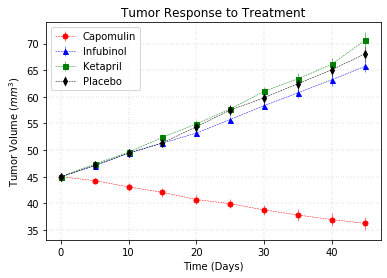

In [8]:
# Generate the Plot (with Error Bars)

#List of Drugs
Drugs=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#Define Keywords
Format={"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

#Generate Plot with ErrorBars 
for drug in Drugs:
    plt.errorbar(transposed_std_err.index,transposed_volume[drug], yerr= transposed_std_err[drug], fmt=Format[drug],
    
                 markersize=5, linestyle="dashed", linewidth=0.50)

#Formatting for Plot    
plt.legend(Drugs,loc='best')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume ($mm^3$)')
plt.title('Tumor Response to Treatment')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.25, color='k')    

# Save the Figure
plt.savefig('../Tumor_Response_to_Treatment.png', orientation='portrait')

#Show the figure
plt.show()


# Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Grouped_Drug_Timepoint= combined.groupby(['Drug','Timepoint'])

Metastatic_sites= Grouped_Drug_Timepoint['Metastatic Sites'].mean()

# Convert to DataFrame

Metastatic_sites_DF= pd.DataFrame(Metastatic_sites)

# Preview DataFrame
Metastatic_sites_DF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

Std_Err_Metastatic_Sites= Grouped_Drug_Timepoint['Metastatic Sites'].sem()

# Convert to DataFrame
Std_Err_Metastatic_Sites_DF= pd.DataFrame(Std_Err_Metastatic_Sites)

# Preview DataFrame
Std_Err_Metastatic_Sites_DF.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames

transposed_Metastatic_Sites= Metastatic_sites_DF.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
transposed_Metastatic_Sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Minor Data Munging to Re-Format the Data Frames

transposed_Std_Err_Metastatic_Sites= Std_Err_Metastatic_Sites_DF.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
transposed_Std_Err_Metastatic_Sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.232210,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.243426,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.255728,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


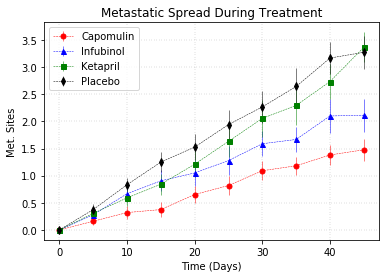

In [13]:
# Generate the Plot (with Error Bars)

Drugs=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
Format={"Capomulin":'ro', 'Infubinol':'b^', 'Ketapril':'gs', 'Placebo': 'kd'}

for drug in Drugs:
    plt.errorbar(transposed_Std_Err_Metastatic_Sites.index,
                transposed_Metastatic_Sites[drug], yerr=transposed_Std_Err_Metastatic_Sites[drug], fmt=Format[drug],
                markersize=5, linestyle="dashed", linewidth=0.50)

#Formatting for Plot 
plt.legend(Drugs,loc='best')
plt.xlabel('Time (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.25, color='k') 
#plt.show()

# Save the Figure
plt.savefig('../Metastatic_Response_to_Treatment.png', orientation='portrait')

#Show the figure
plt.show()

# Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Grouped_Drug_Timepoint= combined.groupby(['Drug','Timepoint'])

# Convert to DataFrame
Mice_Count=pd.DataFrame(Grouped_Drug_Timepoint['Mouse ID'].count())

# Preview DataFrame
Mice_Count.reset_index().head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
transposed_Mice_Count= Mice_Count.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview that Reformatting worked
transposed_Mice_Count


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


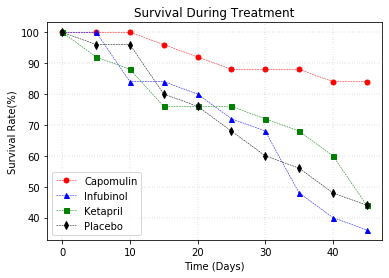

In [16]:
# Generate the Plot (with Error Bars)

for drug in Drugs:
    
    #calculate Survival rates and store as dataframe
    Survival_rates= pd.DataFrame(transposed_Mice_Count[drug]/transposed_Mice_Count.loc[0,drug]*100)
    
    #Generate Plot
    plt.plot(Survival_rates.index, Survival_rates[drug],Format[drug],
                markersize=5, linestyle="dashed", linewidth=0.50)

#Formatting   
plt.legend(Drugs,loc='best')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survival During Treatment')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.25, color='k') 


# Save the Figure
plt.savefig('../Survival_During_Treatment.png', orientation='portrait')

#Show the figure
plt.show()

# Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

percent_change =round((transposed_volume.iloc[-1,:]- transposed_volume.iloc[0,:])/transposed_volume.iloc[0,:]*100,2)

# Display the data to confirm
percent_change

Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

<BarContainer object of 1 artists>

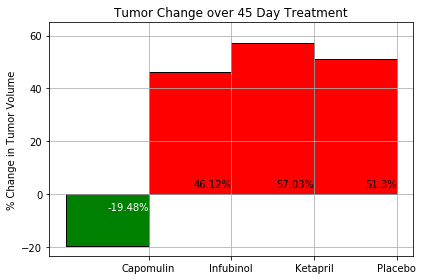

In [18]:
#List of Drugs
Drugs=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# Splice the data between passing and failing drugs
color=['g'if percent_change[drug]<0 else 'r' for drug in Drugs]

#####################################################################################################

#function to label the percentages of changes

def add_label():
    
    # define key words
    x_pos=drug
    value=percent_change[drug]
    y_pos=(-3 if value<0 else 2)
    text= f'{percent_change[drug]}%'
    space=(-5 if value<0 else 5)
    va=('top' if value<0 else 'bottom')
    color=('w'if value<0 else'k')
    
    #to return text layer
    plt.text(x=x_pos,y=y_pos, text=text,ha='right', va= va, s=space, c=color)
#####################################################################################################

#Generate Plot
for i in range(len(Drugs)):
    drug=Drugs[i]
    
    #define X and Y values
    y=percent_change[drug]
    x= drug
    
    #Plot the data
    plot=plt.bar(x,y, color= color[i],align='edge', width=-1, ec='k')
    
    #call function to add labels
    add_label()

# Formatt Plot-Orient widths. Add labels, tick marks, etc.

plt.yticks((-20, 0, 20, 40, 60))     #define ticks for y axis
plt.grid()                          #show gridlines
plt.title("Tumor Change over 45 Day Treatment")    #title for plot
plt.ylabel("% Change in Tumor Volume")
plt.ylim(ymax = 65)
plt.tight_layout()
    
#Save the figure
plt.savefig('../Tumor Change over 45 Day Treatment.png', orientation='portrait')

#Show the figure
plot

# Analytical Conclusions- PYMACEUTICALS

## Capomulin is the most effective of the 4 drugs. During the test period, mice treated with Capomulin had the highest survival rate, slow spread of tumor metastatic sites, and overall reduction in reduction in tumor volume.